# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Call the Open Weather API and check we get 'OK' reponse
        weather_response = requests.get(city_url)
        
        if (weather_response.status_code == 200):
            
            # Parse the JSON and retrieve data
            city_weather = weather_response.json()
            
            # Example JSON record from the reponse:
            # Processing Record 1 of Set 1 | koumra
            # {'coord': {'lon': 17.5539, 'lat': 8.9126}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 35.02, 'feels_like': 35.61, 'temp_min': 35.02, 'temp_max': 35.02, 'pressure': 1008, 'humidity': 34, 'sea_level': 1008, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 1.42, 'deg': 194, 'gust': 1.9}, 'clouds': {'all': 16}, 'dt': 1719665239, 'sys': {'country': 'TD', 'sunrise': 1719635645, 'sunset': 1719681136}, 'timezone': 3600, 'id': 2429605, 'name': 'Koumra', 'cod': 200}

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]            
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]            
            city_clouds = city_weather["clouds"]["all"]                                       
            city_wind = city_weather["wind"]["speed"]                                     
            city_country = city_weather["sys"]["country"]                                        
            city_date = city_weather["dt"]

            # Append the City information into city_data list
            city_data.append({"City": city,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City {city} not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | tsiombe
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | undurkhaan
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | port lincoln
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | porto novo
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | vilyuysk
Processing Record 14 of Set 1 | keflavik
Processing Record 15 of Set 1 | weno
Processing Record 16 of Set 1 | eyl
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | abepura
Processing Record 21 of Set 1 | atafu village
Processing Record 22 of Set 1 | klyuchi
Process

Processing Record 44 of Set 4 | skovorodino
Processing Record 45 of Set 4 | benjamin aceval
Processing Record 46 of Set 4 | cold lake
Processing Record 47 of Set 4 | westport
Processing Record 48 of Set 4 | hawick
Processing Record 49 of Set 4 | lae
Processing Record 0 of Set 5 | noosa heads
Processing Record 1 of Set 5 | condoto
Processing Record 2 of Set 5 | paducah
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | kalmunai
Processing Record 5 of Set 5 | tazovsky
Processing Record 6 of Set 5 | balboa
Processing Record 7 of Set 5 | saryaghash
Processing Record 8 of Set 5 | villamontes
Processing Record 9 of Set 5 | berezovyy
Processing Record 10 of Set 5 | crane
Processing Record 11 of Set 5 | madala
Processing Record 12 of Set 5 | kariba
Processing Record 13 of Set 5 | mendi
Processing Record 14 of Set 5 | fale old settlement
Processing Record 15 of Set 5 | bunia
Processing Record 16 of Set 5 | pacific grove
Processing Record 17 of Set 5 | puerto ayacucho
P

Processing Record 44 of Set 8 | malvan
Processing Record 45 of Set 8 | hobyo
Processing Record 46 of Set 8 | ambon
Processing Record 47 of Set 8 | ruidoso
Processing Record 48 of Set 8 | smidovich
Processing Record 49 of Set 8 | koubia
Processing Record 0 of Set 9 | jalai nur
Processing Record 1 of Set 9 | ubinskoye
Processing Record 2 of Set 9 | tralee
Processing Record 3 of Set 9 | laojunmiao
Processing Record 4 of Set 9 | malindi
Processing Record 5 of Set 9 | kapuskasing
Processing Record 6 of Set 9 | mount pearl
Processing Record 7 of Set 9 | bundaberg north
Processing Record 8 of Set 9 | spanish wells
Processing Record 9 of Set 9 | simpang
Processing Record 10 of Set 9 | villa pigna
Processing Record 11 of Set 9 | tidjikja
Processing Record 12 of Set 9 | muzayri'
Processing Record 13 of Set 9 | oltinko'l
Processing Record 14 of Set 9 | katsuura
Processing Record 15 of Set 9 | tanjung selor
Processing Record 16 of Set 9 | borisoglebsk
Processing Record 17 of Set 9 | varto
Processi

Processing Record 38 of Set 12 | hit
Processing Record 39 of Set 12 | hampton bays
Processing Record 40 of Set 12 | guerrero negro
Processing Record 41 of Set 12 | carutapera
Processing Record 42 of Set 12 | lhokseumawe
Processing Record 43 of Set 12 | kakonko
Processing Record 44 of Set 12 | mildura
Processing Record 45 of Set 12 | bahraigh
Processing Record 46 of Set 12 | yanaul
Processing Record 47 of Set 12 | ayod
Processing Record 48 of Set 12 | kamyzyak
Processing Record 49 of Set 12 | kiboga
Processing Record 0 of Set 13 | moussoro
Processing Record 1 of Set 13 | sassnitz
Processing Record 2 of Set 13 | kapoeta
Processing Record 3 of Set 13 | cockburn town
Processing Record 4 of Set 13 | terekli-mekteb
Processing Record 5 of Set 13 | balkh
Processing Record 6 of Set 13 | poronaysk
Processing Record 7 of Set 13 | garissa
Processing Record 8 of Set 13 | champerico
Processing Record 9 of Set 13 | mugia
Processing Record 10 of Set 13 | sheridan
Processing Record 11 of Set 13 | mosse

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,18.78,75,95,6.74,ZA,1719675964
1,blackmans bay,-43.0167,147.3167,6.07,83,92,7.09,AU,1719675965
2,tsiombe,-25.3000,45.4833,18.28,71,0,3.13,MG,1719675967
3,grytviken,-54.2811,-36.5092,0.24,99,100,2.04,GS,1719675969
4,undurkhaan,47.3194,110.6556,14.57,81,100,3.37,MN,1719675970


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.78,75,95,6.74,ZA,1719675964
1,blackmans bay,-43.0167,147.3167,6.07,83,92,7.09,AU,1719675965
2,tsiombe,-25.3000,45.4833,18.28,71,0,3.13,MG,1719675967
3,grytviken,-54.2811,-36.5092,0.24,99,100,2.04,GS,1719675969
4,undurkhaan,47.3194,110.6556,14.57,81,100,3.37,MN,1719675970


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

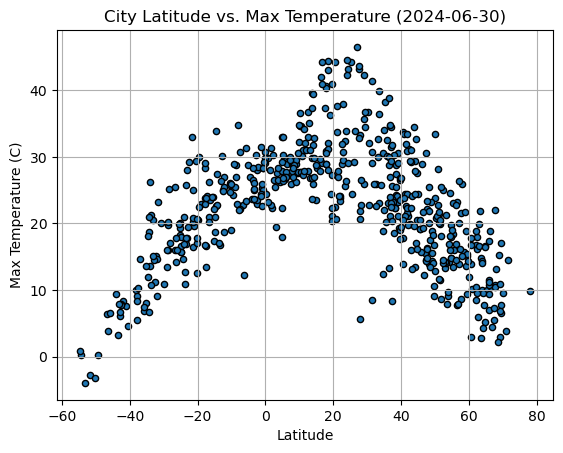

In [11]:
# Build scatter plot for latitude vs. temperature
ax = city_data_df.plot(kind='scatter', x="Lat", y="Max Temp", edgecolors='k')

# Incorporate the other graph properties
dt = datetime.datetime.fromtimestamp(city_data_df.loc[0, "Date"])
ax.set_title(f"City Latitude vs. Max Temperature ({dt.date()})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

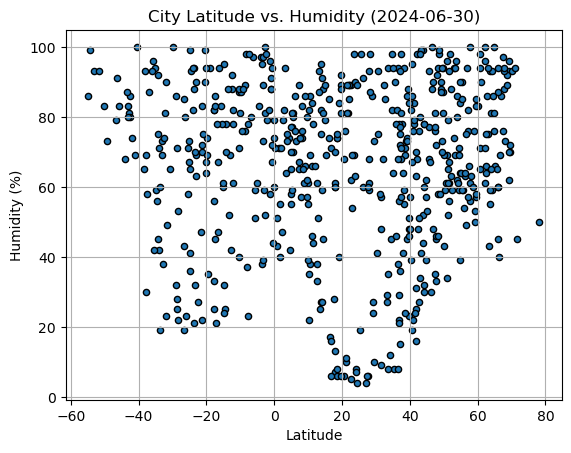

In [12]:
# Build the scatter plots for latitude vs. humidity
ax = city_data_df.plot(kind='scatter', x="Lat", y="Humidity", edgecolors='k')

# Incorporate the other graph properties
ax.set_title(f"City Latitude vs. Humidity ({dt.date()})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

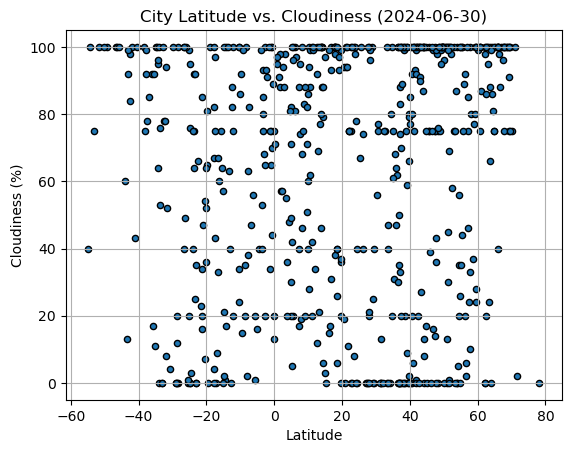

In [13]:
# Build the scatter plots for latitude vs. cloudiness
ax = city_data_df.plot(kind='scatter', x="Lat", y="Cloudiness", edgecolors='k')

# Incorporate the other graph properties
ax.set_title(f"City Latitude vs. Cloudiness ({dt.date()})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

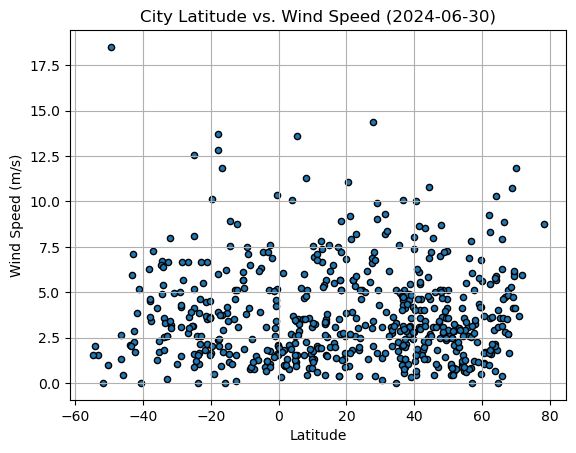

In [14]:
# Build the scatter plots for latitude vs. wind speed
ax = city_data_df.plot(kind='scatter', x="Lat", y="Wind Speed", edgecolors='k')

# Incorporate the other graph properties
ax.set_title(f"City Latitude vs. Wind Speed ({dt.date()})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def create_scatterplot_with_linear_regression_overlay(df, y_axis_variable, line_eq_location_xy_tuple):
    # Subset the supplied dataframe according to Latitude & the requested 'y_axis_variable'
    x_axis_variable = "Lat"
    dataset = df[ [x_axis_variable, y_axis_variable] ]
    
    # Compute linear regression calculations...
    x_values = dataset[x_axis_variable]
    y_values = dataset[y_axis_variable]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # ...and output the correlation coefficient
    print(f"The r^2-value is:  {rvalue**2}")
    
    # Create the scatter plot
    x_axis_label = "Latitude"
    dataset.plot(kind='scatter', x=x_axis_variable, y=y_axis_variable, legend=False, \
                 xlabel=x_axis_label, ylabel=y_axis_variable, \
                 title = f"{x_axis_label} vs {y_axis_variable}"
                )
    # Overlay the regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, line_eq_location_xy_tuple, fontsize=14, color='red')
    plt.show()

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[ city_data_df["Lat"] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,undurkhaan,47.3194,110.6556,14.57,81,100,3.37,MN,1719675970
7,hawaiian paradise park,19.5933,-154.9731,21.05,92,20,2.57,US,1719675975
8,porto novo,6.4965,2.6036,28.90,73,97,5.25,BJ,1719675976
9,bethel,41.3712,-73.4140,22.64,84,100,3.09,US,1719675978
10,albany,42.6001,-73.9662,19.97,76,100,1.79,US,1719675979


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[ city_data_df["Lat"] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,18.78,75,95,6.74,ZA,1719675964
1,blackmans bay,-43.0167,147.3167,6.07,83,92,7.09,AU,1719675965
2,tsiombe,-25.3000,45.4833,18.28,71,0,3.13,MG,1719675967
3,grytviken,-54.2811,-36.5092,0.24,99,100,2.04,GS,1719675969
5,port elizabeth,-33.9180,25.5701,26.16,42,0,3.60,ZA,1719675912


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is:  0.4674575769572732


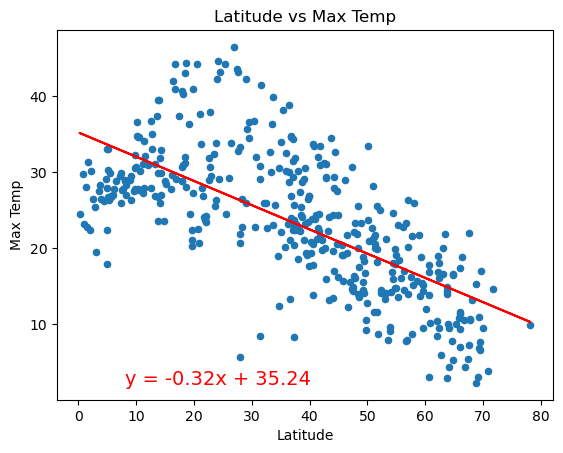

In [56]:
# Linear regression on Northern Hemisphere
create_scatterplot_with_linear_regression_overlay(northern_hemi_df, "Max Temp", (8,2))

The r^2-value is:  0.6893991810258778


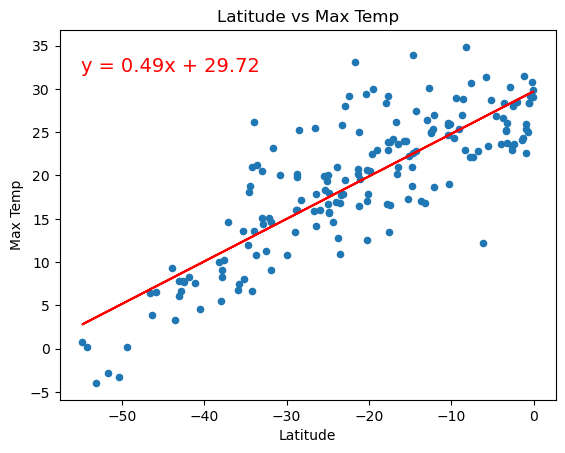

In [57]:
# Linear regression on Southern Hemisphere
create_scatterplot_with_linear_regression_overlay(southern_hemi_df, "Max Temp", (-55, 32))

**Discussion about the linear relationship:** 
- As expected, Maximum Temperature is moderately correlated with Latitude (r^2-values were moderate).
- 'Max Temp' readings were shown to decrease towards higher latitudes (i.e. as you move away from the Equator, closer to the Northern or Southern pole). 
- At the time of writing (for data captured on 2024-06-30), it's Summer in the Northern hemisphere, and Winter in the Southern hemisphere, which is reflected somewhat in the data as the Maxiumum Temperatures for the Northern hemisphere were all above zero, whereas some Southern hemisphere Maximum Temperatures were below zero.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is:  0.03180232569343822


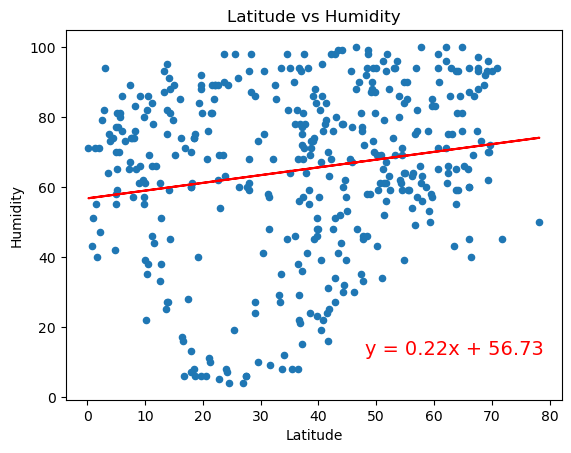

In [58]:
# Northern Hemisphere
create_scatterplot_with_linear_regression_overlay(northern_hemi_df, "Humidity", (48,12))

The r^2-value is:  6.050858611441447e-06


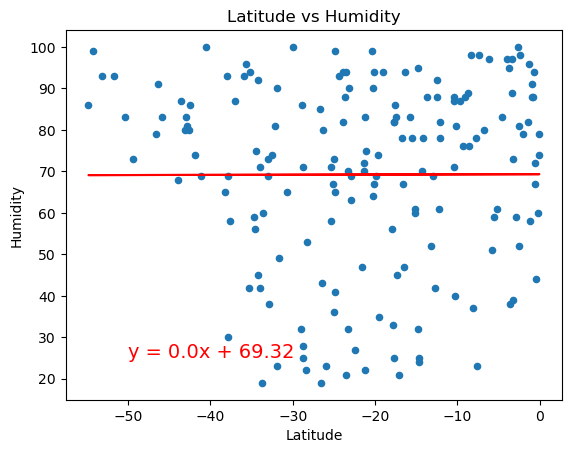

In [59]:
# Southern Hemisphere
create_scatterplot_with_linear_regression_overlay(southern_hemi_df, "Humidity", (-50,25))

**Discussion about the linear relationship:**
- There was no correlation found between Humidity and Latitude (r^2-values almost zero).
- In other words, Humidity is not dependent on Latitude. 
- Humidity is the concentration of moisture vapor in the air, and is dependent on air temperature and pressure.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is:  0.0057095536649467244


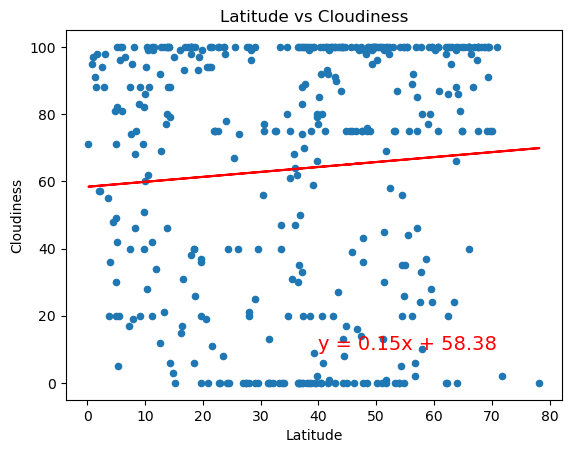

In [60]:
# Northern Hemisphere
create_scatterplot_with_linear_regression_overlay(northern_hemi_df, "Cloudiness", (40, 10))

The r^2-value is:  0.0180585280558942


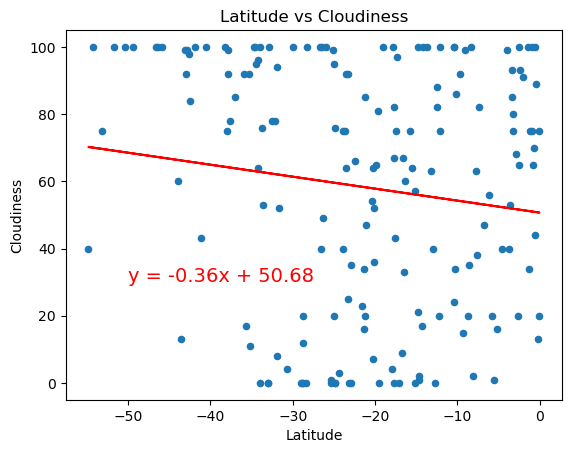

In [61]:
# Southern Hemisphere
create_scatterplot_with_linear_regression_overlay(southern_hemi_df, "Cloudiness", (-50, 30))

**Discussion about the linear relationship:**
- There was no correlation found between Humidity and Latitude (r^2-values almost zero).
- As a measure, Cloudiness is similar to Humidity so that's not unexpected.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is:  0.0010908843823650275


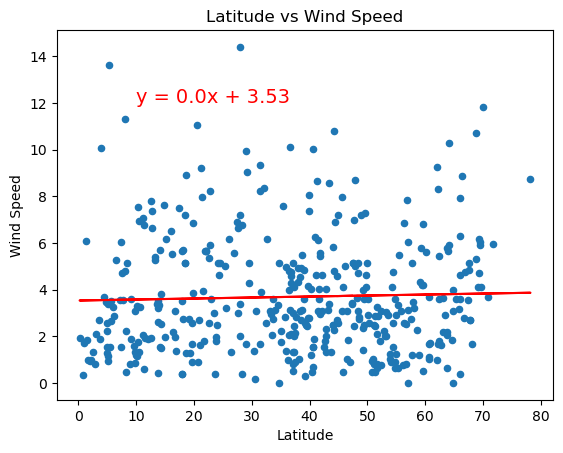

In [62]:
# Northern Hemisphere
create_scatterplot_with_linear_regression_overlay(northern_hemi_df, "Wind Speed", (10, 12))

The r^2-value is:  5.9859852411752604e-05


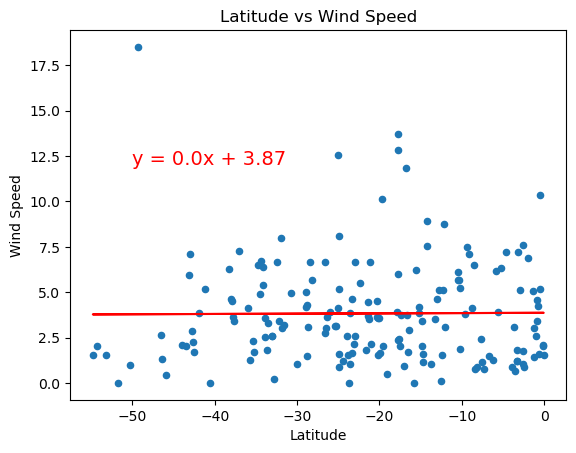

In [63]:
# Southern Hemisphere
create_scatterplot_with_linear_regression_overlay(southern_hemi_df, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** 
- There was no correlation found between Wind Speed and Latitude (r^2-values almost zero).